# Kernel methods

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# For generating synthetic datasets
from sklearn.datasets import make_classification

## Generate data

In [3]:
# Generating synthetic data with 2 classes and 2 features
X, y = make_classification(n_samples=600, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=42)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train SVM with RBF kernel

In [4]:
# Define the RBF kernel SVM with default sigma (gamma in scikit-learn)
svm_rbf = SVC(kernel='rbf', C=1.0)

# Train the model
svm_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_rbf.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


[[51  1]
 [11 57]]
Accuracy: 90.00%


## Cross validation with grid search

In [6]:
# Define parameter grid for C and gamma (sigma)
param_grid = {'C': np.logspace(-2, 2, 5), 'gamma': np.logspace(-2, 2, 5)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best C: {best_params['C']}, Best Gamma: {best_params['gamma']}")

# Train the model with the best parameters
svm_best = grid_search.best_estimator_
y_pred_best = svm_best.predict(X_test)

# Final accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Accuracy: {accuracy_best * 100:.2f}%")


Best C: 0.1, Best Gamma: 1.0
Best Accuracy: 90.00%


## Plotting decision boundary

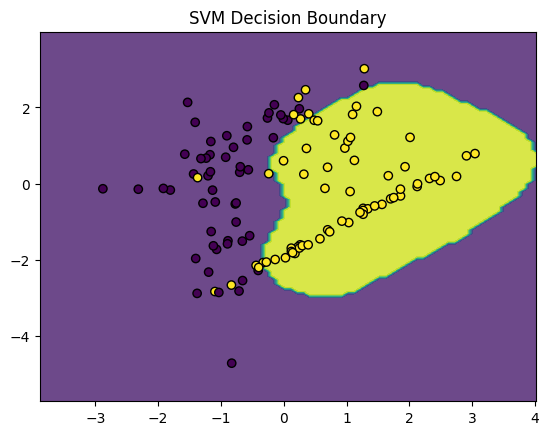

In [8]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    # Create mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contours and points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title("SVM Decision Boundary")
    plt.show()

# Plot the decision boundary for the best model
plot_decision_boundary(svm_best, X_test, y_test)


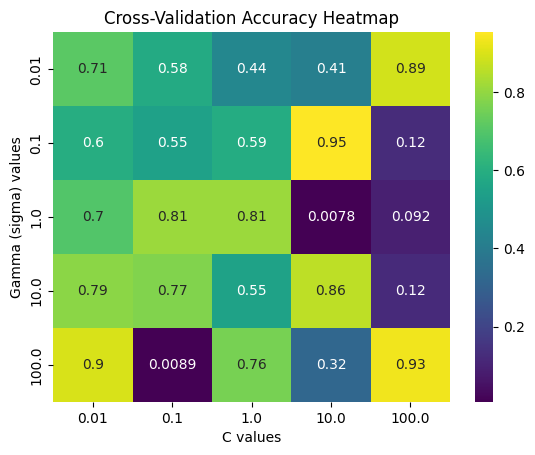

In [9]:
# Accuracy matrix (for illustrative purposes, using random data)
accuracy_matrix = np.random.rand(5, 5)

# Plot heatmap
sns.heatmap(accuracy_matrix, annot=True, cmap='viridis', xticklabels=np.round(param_grid['C'], 2), yticklabels=np.round(param_grid['gamma'], 2))
plt.xlabel('C values')
plt.ylabel('Gamma (sigma) values')
plt.title('Cross-Validation Accuracy Heatmap')
plt.show()


## Linear SVM

In [10]:
# Train a linear SVM model
linear_svm = SVC(kernel='linear', C=1.0)  # 'linear' kernel
linear_svm.fit(X_train, y_train)

# Predictions and performance evaluation
y_pred_linear = linear_svm.predict(X_test)

# Confusion matrix and accuracy for linear SVM
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print("Linear SVM Confusion Matrix:")
print(conf_matrix_linear)
print(f"Linear SVM Accuracy: {accuracy_linear * 100:.2f}%")


Linear SVM Confusion Matrix:
[[50  2]
 [ 9 59]]
Linear SVM Accuracy: 90.83%


## Polynomial kernel

In [11]:
# Train a polynomial kernel SVM model (degree 3 by default)
poly_svm = SVC(kernel='poly', degree=3, C=1.0)
poly_svm.fit(X_train, y_train)

# Predictions and performance evaluation
y_pred_poly = poly_svm.predict(X_test)

# Confusion matrix and accuracy for polynomial SVM
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

print("\nPolynomial SVM Confusion Matrix:")
print(conf_matrix_poly)
print(f"Polynomial SVM Accuracy: {accuracy_poly * 100:.2f}%")



Polynomial SVM Confusion Matrix:
[[49  3]
 [10 58]]
Polynomial SVM Accuracy: 89.17%


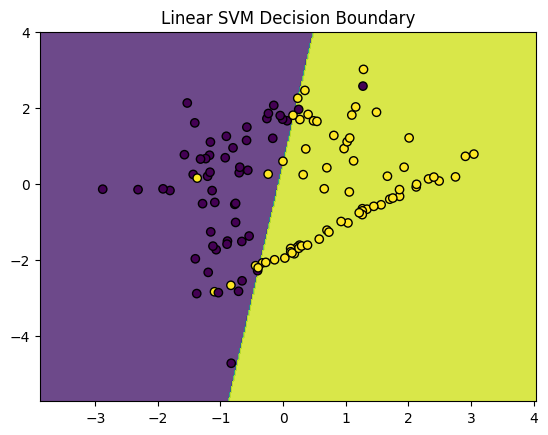

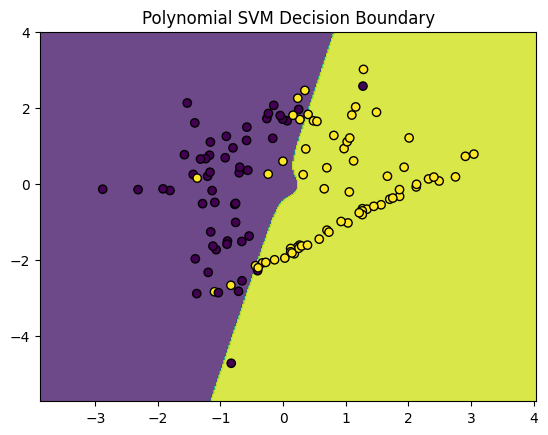

In [12]:
# Function to plot decision boundaries for 2D datasets
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundary for linear SVM
plot_decision_boundary(linear_svm, X_test, y_test, title="Linear SVM Decision Boundary")

# Plot decision boundary for polynomial SVM
plot_decision_boundary(poly_svm, X_test, y_test, title="Polynomial SVM Decision Boundary")



Best C for polynomial SVM: 0.1, Best degree: 3
Best Polynomial SVM Accuracy: 89.17%


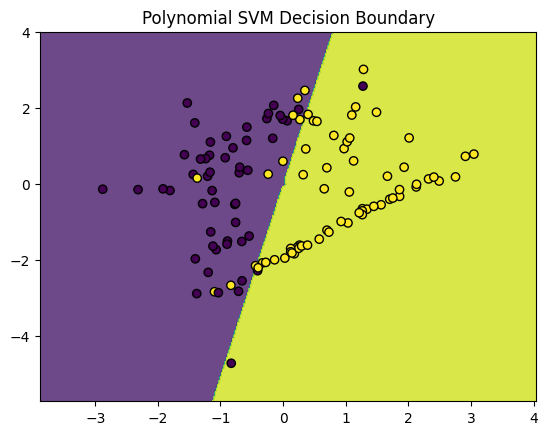

In [14]:
# Parameter grid for C and degree of the polynomial
param_grid_poly = {'C': np.logspace(-2, 2, 5), 'degree': [2, 3, 4, 5]}

# Grid search with cross-validation for polynomial kernel SVM
grid_search_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=5, scoring='accuracy')
grid_search_poly.fit(X_train, y_train)

# Best parameters for polynomial SVM
best_params_poly = grid_search_poly.best_params_
print(f"\nBest C for polynomial SVM: {best_params_poly['C']}, Best degree: {best_params_poly['degree']}")

# Train the best polynomial SVM model
poly_svm_best = grid_search_poly.best_estimator_
y_pred_poly_best = poly_svm_best.predict(X_test)

# Final accuracy for the best polynomial model
accuracy_poly_best = accuracy_score(y_test, y_pred_poly_best)
print(f"Best Polynomial SVM Accuracy: {accuracy_poly_best * 100:.2f}%")

# Plot decision boundary for polynomial SVM
plot_decision_boundary(poly_svm_best, X_test, y_test, title="Polynomial SVM Decision Boundary")
